# 04. Feature Importance Analysis

## Objective
Extract and analyze feature importance from the saved model to identify:
1. Which features are most predictive
2. Which features might be redundant
3. Opportunities for feature selection
4. Domain insights about what drives financial trajectories


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from xgboost import XGBClassifier

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Libraries imported")


✅ Libraries imported


## 1. Load Model and Extract Feature Importance


In [2]:
# Load the saved model
model = joblib.load('../today/models/final_trajectory_model.joblib')

# Extract the XGBoost classifier from the pipeline
xgb_model = model.named_steps['classifier']

# Get feature names from the preprocessor
preprocessor = model.named_steps['preprocessor']
df = pd.read_csv('../today/trajectory_ml_ready_advanced.csv')

# Prepare features to get feature names after preprocessing
drop_cols = ['UNITID', 'Institution_Name', 'Year', 'Target_Trajectory', 'Target_Label', 'State']
X = df.drop(columns=drop_cols)
y = df['Target_Label']

# Transform to get feature names
X_transformed = preprocessor.transform(X.head(1))
feature_names = preprocessor.get_feature_names_out()

# Get feature importance
importances = xgb_model.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("=" * 60)
print("TOP 20 MOST IMPORTANT FEATURES")
print("=" * 60)
print(feature_importance_df.head(20).to_string(index=False))


TOP 20 MOST IMPORTANT FEATURES
                    Feature  Importance
   num__Efficiency_Mean_2yr    0.315712
           cat__Division_D1    0.185281
        cat__Division_Other    0.073839
      cat__Division_Unknown    0.040121
    num__Expense_Growth_1yr    0.031473
    num__Revenue_Growth_1yr    0.031267
      num__Revenue_Mean_2yr    0.026724
      num__Expense_CAGR_2yr    0.026452
      num__Revenue_CAGR_2yr    0.026397
      num__Expense_Mean_2yr    0.026220
  num__Grand Total Expenses    0.023754
   num__Grand Total Revenue    0.022992
num__Expense_Volatility_2yr    0.022944
  num__Womens_Expense_Share    0.022798
    num__Male_Athlete_Share    0.022398
        num__Total_Athletes    0.021600
num__Revenue_Volatility_2yr    0.021425
    num__Mens_Expense_Share    0.021206
   num__Revenue_Per_Athlete    0.019027
   num__Expense_Per_Athlete    0.018370


/Users/mukeshravichandran/ML EDA/.venv/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.4.2 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mukeshravichandran/ML EDA/.venv/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator FunctionTransformer from version 1.4.2 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/mukeshravichandran/ML EDA/.venv/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator ColumnTr

## 2. Visualize Feature Importance


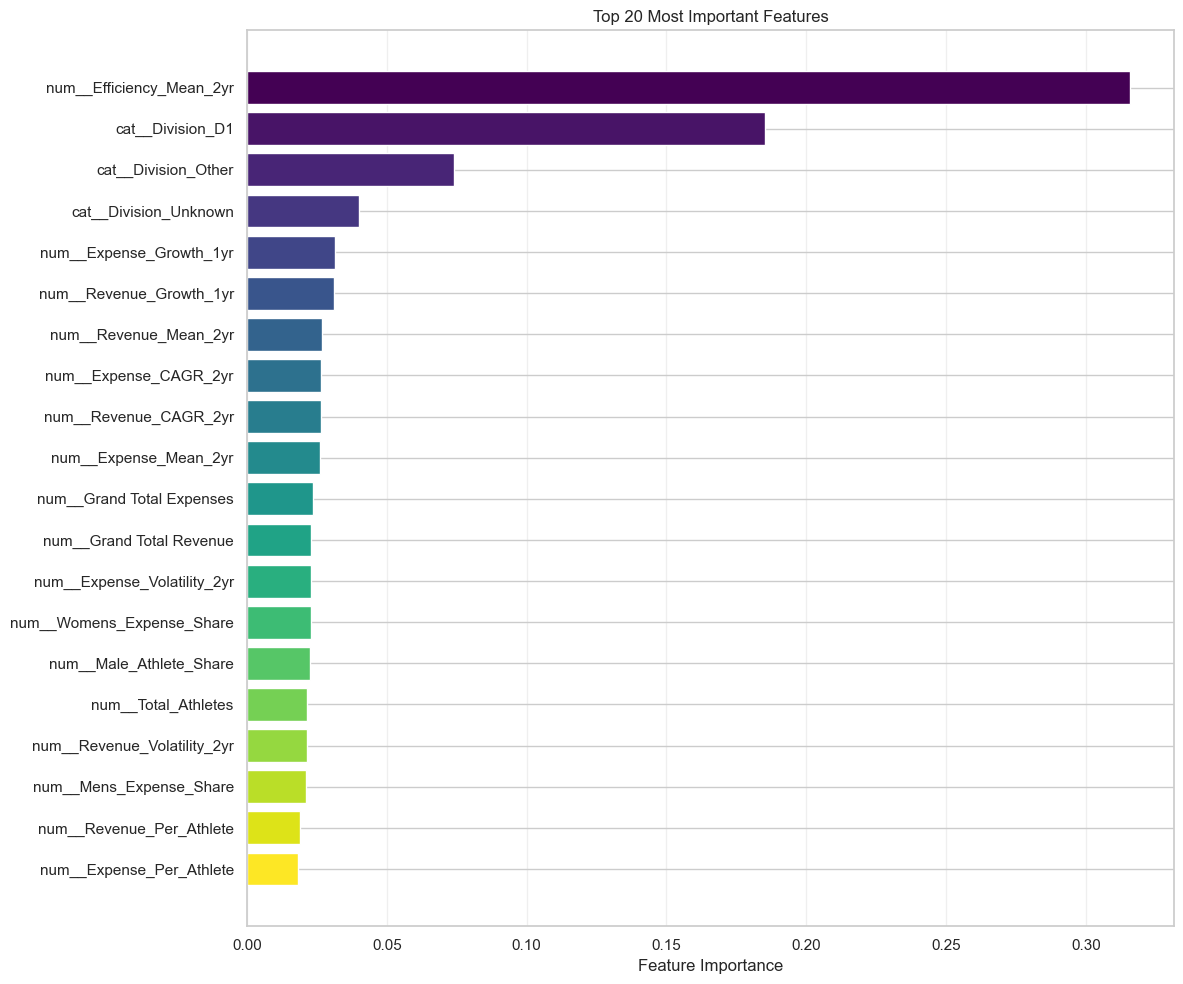

📊 Chart saved as 'feature_importance_top20.png'


In [3]:
# Plot top 20 features
top_n = 20
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(12, 10))
bars = plt.barh(range(len(top_features)), top_features['Importance'], 
                color=plt.cm.viridis(np.linspace(0, 1, len(top_features))))
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Most Important Features')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance_top20.png', dpi=150, bbox_inches='tight')
plt.show()

print("📊 Chart saved as 'feature_importance_top20.png'")


## 3. Feature Categories Analysis


FEATURE IMPORTANCE BY CATEGORY
Category
Efficiency        0.315712
Division          0.299241
Expense           0.193218
Revenue           0.147831
Participation     0.043998
Sport-Specific    0.000000


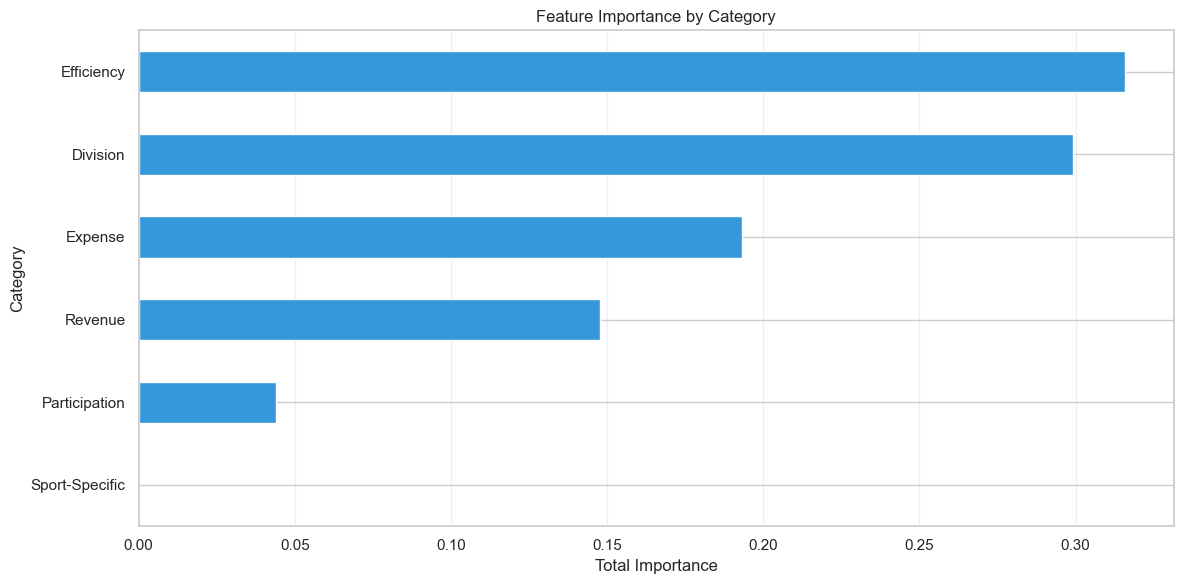


📊 Chart saved as 'feature_importance_by_category.png'


In [4]:
# Categorize features
def categorize_feature(feature_name):
    feature_lower = feature_name.lower()
    
    if 'revenue' in feature_lower:
        return 'Revenue'
    elif 'expense' in feature_lower:
        return 'Expense'
    elif 'efficiency' in feature_lower:
        return 'Efficiency'
    elif 'growth' in feature_lower or 'cagr' in feature_lower:
        return 'Growth'
    elif 'volatility' in feature_lower:
        return 'Volatility'
    elif 'division' in feature_lower:
        return 'Division'
    elif 'athlete' in feature_lower or 'participation' in feature_lower:
        return 'Participation'
    elif 'football' in feature_lower or 'basketball' in feature_lower:
        return 'Sport-Specific'
    elif 'mens' in feature_lower or 'womens' in feature_lower or 'gender' in feature_lower:
        return 'Gender'
    elif 'reports_exactly_one' in feature_lower:
        return 'Data Quality'
    else:
        return 'Other'

feature_importance_df['Category'] = feature_importance_df['Feature'].apply(categorize_feature)

# Aggregate by category
category_importance = feature_importance_df.groupby('Category')['Importance'].sum().sort_values(ascending=False)

print("=" * 60)
print("FEATURE IMPORTANCE BY CATEGORY")
print("=" * 60)
print(category_importance.to_string())

# Visualize
plt.figure(figsize=(12, 6))
category_importance.plot(kind='barh', color='#3498db')
plt.xlabel('Total Importance')
plt.title('Feature Importance by Category')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance_by_category.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Chart saved as 'feature_importance_by_category.png'")


## 4. Feature Selection Recommendations


FEATURE SELECTION RECOMMENDATIONS

Total Features: 23
Features for 90% importance: 16
Features for 95% importance: 18

Low Importance Features (< 0.001): 3

Consider removing:
                    Feature  Importance
num__Football_Revenue_Share         0.0
num__Football_Expense_Share         0.0
          num__Has_Football         0.0


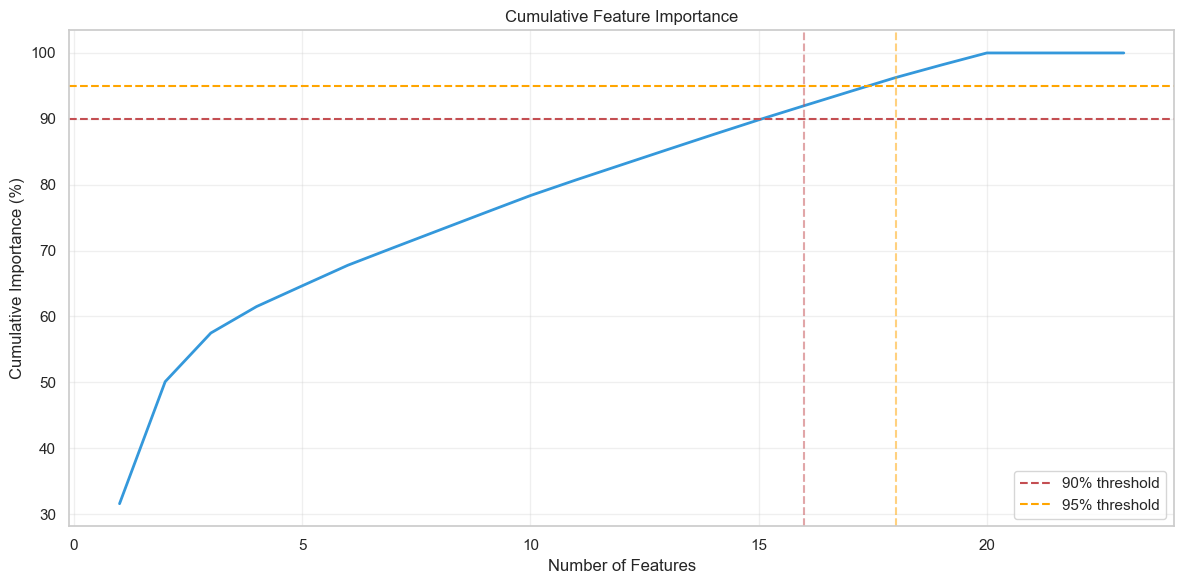


📊 Chart saved as 'cumulative_feature_importance.png'


In [5]:
# Identify low-importance features that could be removed
cumulative_importance = feature_importance_df['Importance'].cumsum()
total_importance = feature_importance_df['Importance'].sum()

# Features that contribute to 95% of importance
threshold_95 = 0.95
n_features_95 = (cumulative_importance / total_importance <= threshold_95).sum() + 1

# Features that contribute to 90% of importance
threshold_90 = 0.90
n_features_90 = (cumulative_importance / total_importance <= threshold_90).sum() + 1

print("=" * 60)
print("FEATURE SELECTION RECOMMENDATIONS")
print("=" * 60)
print(f"\nTotal Features: {len(feature_importance_df)}")
print(f"Features for 90% importance: {n_features_90}")
print(f"Features for 95% importance: {n_features_95}")

# Low importance features
low_importance_threshold = 0.001  # Features with < 0.1% importance
low_importance_features = feature_importance_df[feature_importance_df['Importance'] < low_importance_threshold]

print(f"\nLow Importance Features (< {low_importance_threshold}): {len(low_importance_features)}")
if len(low_importance_features) > 0:
    print("\nConsider removing:")
    print(low_importance_features[['Feature', 'Importance']].to_string(index=False))

# Visualize cumulative importance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_importance) + 1), 
         cumulative_importance / total_importance * 100, 
         linewidth=2, color='#3498db')
plt.axhline(y=90, color='r', linestyle='--', label='90% threshold')
plt.axhline(y=95, color='orange', linestyle='--', label='95% threshold')
plt.axvline(x=n_features_90, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=n_features_95, color='orange', linestyle='--', alpha=0.5)
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance (%)')
plt.title('Cumulative Feature Importance')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('cumulative_feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Chart saved as 'cumulative_feature_importance.png'")


## 5. Summary and Insights


In [6]:
print("=" * 60)
print("FEATURE IMPORTANCE SUMMARY")
print("=" * 60)

print("\n🔑 Key Insights:")
print(f"1. Top 5 Features:")
for i, row in feature_importance_df.head(5).iterrows():
    print(f"   {i+1}. {row['Feature']}: {row['Importance']:.4f}")

print(f"\n2. Most Important Category: {category_importance.index[0]}")
print(f"   Total Importance: {category_importance.iloc[0]:.4f}")

print(f"\n3. Feature Reduction Potential:")
print(f"   - Can reduce from {len(feature_importance_df)} to {n_features_95} features")
print(f"   - Maintains 95% of predictive power")
print(f"   - Reduces model complexity by {((len(feature_importance_df) - n_features_95) / len(feature_importance_df) * 100):.1f}%")

print("\n4. Domain Insights:")
top_5_features = feature_importance_df.head(5)['Feature'].tolist()
print(f"   The model relies most heavily on: {', '.join(top_5_features[:3])}")

print("\n5. Recommendations:")
print("   - Consider feature selection to reduce overfitting")
print("   - Focus on top features for interpretability")
print("   - Test model with reduced feature set")
print("   - Investigate why certain features are important")


FEATURE IMPORTANCE SUMMARY

🔑 Key Insights:
1. Top 5 Features:
   13. num__Efficiency_Mean_2yr: 0.3157
   1. cat__Division_D1: 0.1853
   2. cat__Division_Other: 0.0738
   3. cat__Division_Unknown: 0.0401
   8. num__Expense_Growth_1yr: 0.0315

2. Most Important Category: Efficiency
   Total Importance: 0.3157

3. Feature Reduction Potential:
   - Can reduce from 23 to 18 features
   - Maintains 95% of predictive power
   - Reduces model complexity by 21.7%

4. Domain Insights:
   The model relies most heavily on: num__Efficiency_Mean_2yr, cat__Division_D1, cat__Division_Other

5. Recommendations:
   - Consider feature selection to reduce overfitting
   - Focus on top features for interpretability
   - Test model with reduced feature set
   - Investigate why certain features are important
